In [1]:
import pandas as pd
#!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
#!pip install seaborn
import seaborn as sns
#!pip install missingno
import missingno as msno
#!pip install squarify
import squarify    

In [2]:
df = pd.read_csv('big_startup_secsees_dataset.csv')

In [3]:
df

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB


# Exploratory Data Analysis

Handling with missing values
Let's visualize missing values

In [5]:
df.isnull().sum()/df.count()*100

permalink             0.000000
name                  0.001507
homepage_url          8.249878
category_list         4.979437
funding_total_usd     0.000000
status                0.000000
country_code         11.711833
state_code           14.781827
region               13.764613
city                 13.760713
funding_rounds        0.000000
founded_at           29.759321
first_funding_at      0.036175
last_funding_at       0.000000
dtype: float64

<AxesSubplot:>

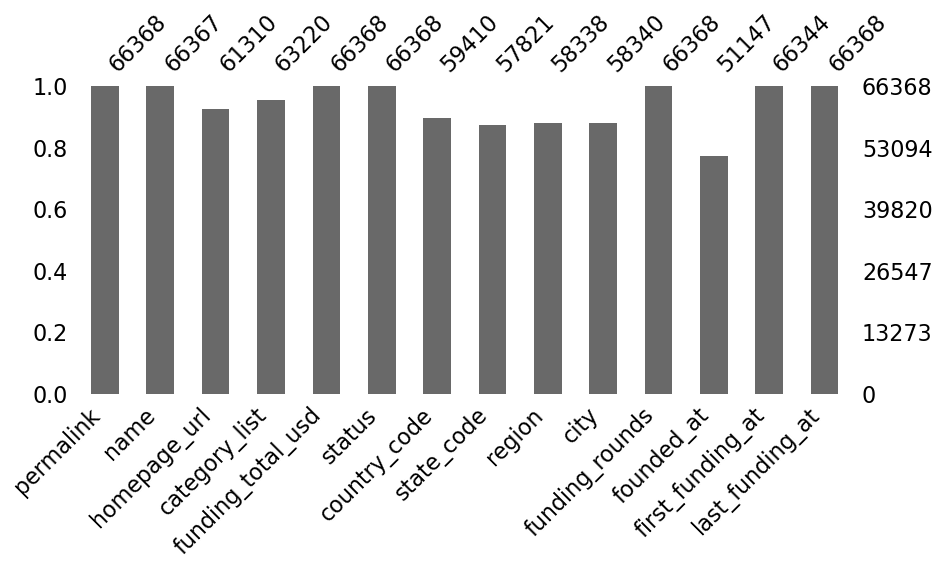

In [6]:
msno.bar(df, figsize=(10,4))

See if we find a pattern in the missing values, such as a part of the dataset where values are missing for many columns at once.

<AxesSubplot:>

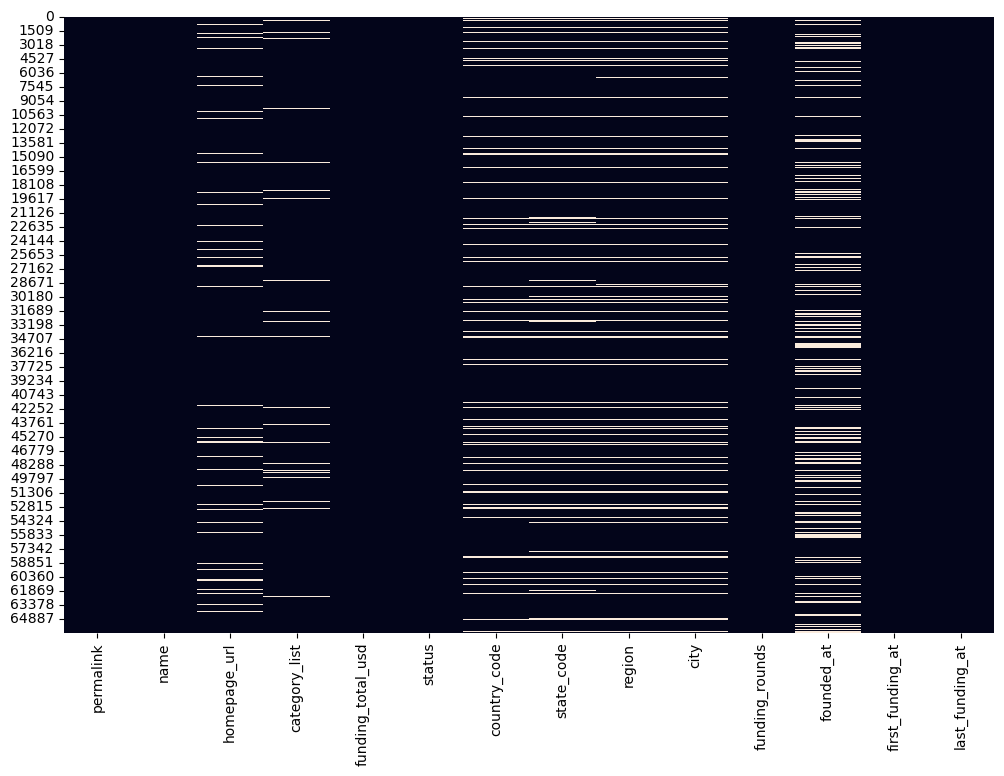

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False)

We can't distinguish a clear interval of rows with missing values, nor a clear relation, the only thing that we can appreciate is that almost all the rows with a missing value in the country_code column, also have missing values in state, region, and city.

We have almost 5% of missing data in the category column, we can fill it with "Other".

For the columns related to location, we can see that when data is missing in one, data is almost always missing in the others, which makes sense because, if we don't have information about which country it is in, we probably don't know more specific data either. We are talking about having almost 90% of the data in the country code column, which is not bad. We could fill in the missing values using a Random Sample Imputation.

Finally, we have the column with the most missing data, having only about 70% of the data when it was founded. We could replace those values by first_funding_at or extract the years (which is what we are looking for), and apply a fill using Random Sample Imputation as well.

Text(0, 0.5, 'Number of startups')

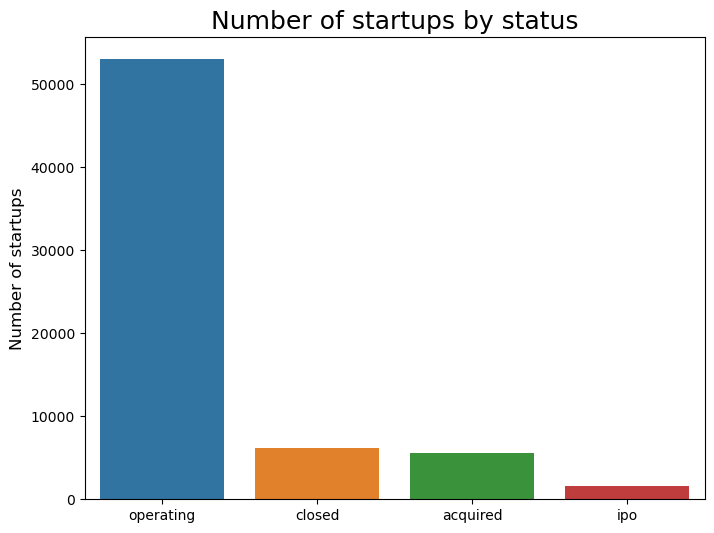

In [8]:
plt.figure(figsize=(8,6))
sns.barplot(x=df['status'].value_counts().index,y=df['status'].value_counts())
plt.title('Number of startups by status',size=18)
plt.ylabel('Number of startups',size=12)

In [9]:
df['funding_rounds'].value_counts()

1     42472
2     12353
3      5606
4      2739
5      1468
6       774
7       418
8       214
9       126
10       79
11       51
12       28
13       15
15        6
14        6
16        6
17        3
18        3
19        1
Name: funding_rounds, dtype: int64

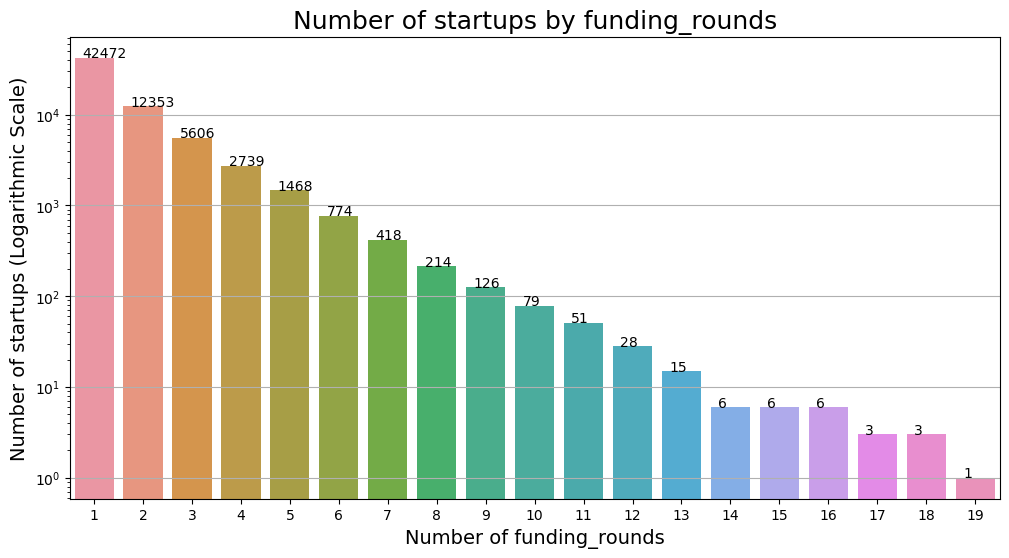

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['funding_rounds'].value_counts().index, y=df['funding_rounds'].value_counts())
plt.title('Number of startups by funding_rounds',size=18)
plt.ylabel('Number of startups (Logarithmic Scale)',size=14)
plt.xlabel('Number of funding_rounds', size=14)
plt.grid(axis='y')
plt.yscale('log')

def addlabels(x,y):
    for i in x:
        plt.text(i-1.25,y[i],y[i])

addlabels(df['funding_rounds'].value_counts().index,df['funding_rounds'].value_counts())

In [15]:
df['category_list'].value_counts()

Software                                                                       3995
Biotechnology                                                                  3615
E-Commerce                                                                     1332
Mobile                                                                         1177
Clean Technology                                                               1133
                                                                               ... 
Consumer Internet|Marketplaces|Mobile|Mobile Payments|Transportation|Travel       1
Apps|Mobile|Private Social Networking                                             1
Cloud Computing|Enterprise Software|Infrastructure|PaaS|Social Media              1
Content|SaaS|Social Media Marketing|Software                                      1
Consumer Goods|E-Commerce|Internet                                                1
Name: category_list, Length: 27296, dtype: int64

We have more than 27_000 differentes category types.

We can see that at the end there are categories with only one stratup, but this is mainly due to the fact that the company fits into multiple categories, having a combination of several of them.

We could assume that the first category that appears refers to its main category.
Choose the subcategory that is present among the most frequent categories, as to have a more general view of the startups.

# Data Wrangling 

Transform funding_total_usd in float, and fill missing values

In [16]:
def str_to_float(row):
    if '-' in row:
        row = np.nan
    else:
        row = float(row)
    return row
        
df['funding_total_usd'] = df['funding_total_usd'].apply(str_to_float)
df['funding_total_usd'].dtypes

dtype('float64')

In [17]:
df['funding_total_usd'].isnull().sum()

12785

Here we see that we do in fact have missing values for the funding_total_usd column, only that they were previously filled with '-'.

Let's see the distribution of the fundind_total_usd column ignoring NaN values

In [18]:
df['funding_total_usd'].aggregate([np.nanmean,np.nanmedian,np.nanstd])

nanmean      1.847860e+07
nanmedian    2.000000e+06
nanstd       1.880133e+08
Name: funding_total_usd, dtype: float64

Let's see the estimated location and the estimated variability of the funding_total_usd grouping by
funding_rounds.

In [19]:
funding_rounds_group = df.groupby('funding_rounds')['funding_total_usd'].aggregate(['count',np.nanmean,np.nanmedian,np.nanstd])
funding_rounds_group.head()

,count,nanmean,nanmedian,nanstd
funding_rounds,,,,
1,30789,1.007059e+07,896000.0,1.382065e+08
2,11477,1.404059e+07,2870000.0,9.023609e+07
3,5447,2.289590e+07,7500000.0,8.833278e+07
4,2697,3.400935e+07,14650000.0,7.141552e+07
5,1456,7.170403e+07,25322724.5,7.926982e+08


Let's fill missing values in the column funding_total_usd with the mean calculated above. Depending on the number of funding rounds would be the mean assigned.

In [20]:
funding_filled = []

for h,i in enumerate(df['funding_total_usd']):
    if np.isnan(i):
        i = int(funding_rounds_group.loc[df['funding_rounds'].iloc[h],'nanmean'])
        funding_filled.append(i)
    else:
        funding_filled.append(int(i))
    
df['funding_filled'] = funding_filled
df['funding_filled'].isnull().sum()

0

One Hot Encoding and classify by status class
Let's create a column that classifies startups depending on whether they succeeded, failed or are still operating.
As well as apply One Hot Encoding to transform categorical variables in number values

In [21]:
status = []

for i in df['status']:
    if i in ['acquired','ipo']:
        status.append('success')
    elif i == 'closed':
        status.append('fail')
    else:
        status.append('operating')
        
df['status_class'] = status

In [22]:
status_class = pd.get_dummies(df['status_class'])
df = pd.concat([df,status_class],axis=1)
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,10000000,operating,0,1,0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,700000,operating,0,1,0
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30,3406878,operating,0,1,0
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2000000,operating,0,1,0
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,10070591,operating,0,1,0


We have a lot of missing values in country_code column as well as in founded_at column, so dropping those rows it's not an option, due to would be the big amount of data that we'll lose.

Filling country code column with Random Sample Imputation
We could fill in the missing values with the numpy random choice method (except for the null values), choosing according to their probability of being chosen.

The more startups are created in that country, the more likely it is that the missing value corresponds to that country.

In [23]:
# Let's see the status of startups depending on the country
country = []

for i in df.country_code:
  if not isinstance(i,str):
    country.append(np.random.choice(df.country_code[df.country_code.notnull()]))
  else:
    country.append(i)

df['country'] = country

In [24]:
# Original column
country_code_column = pd.DataFrame()
country_code_column['count'] = df.country_code.value_counts()
country_code_column['count/Total'] = df.country_code.value_counts()/df.country_code.count()
country_code_column['fail'] = df.groupby('country_code')['fail'].sum()/df.country_code.value_counts()
country_code_column['success'] = df.groupby('country_code')['success'].sum()/df.country_code.value_counts()
country_code_column = country_code_column[:10]

# Our column
country_column = pd.DataFrame()
country_column['count'] = df.country.value_counts()
country_column['count/Total'] = df.country.value_counts()/df.country.count()
country_column['fail'] = df.groupby('country')['fail'].sum()/df.country.value_counts()
country_column['success'] = df.groupby('country')['success'].sum()/df.country.value_counts()
country_column = country_column[:10]

# Let's see de difference between both columns
country_column - country_code_column

,count,count/Total,fail,success
USA,4453,0.000742,0.017471,-0.010000
GBR,436,0.000061,0.013283,-0.001848
CAN,219,-0.000097,0.012138,-0.007445
IND,163,-0.000360,0.018165,0.000496
CHN,174,-0.000103,0.016625,-0.003986
FRA,103,-0.000451,0.015947,-0.001751
DEU,145,0.000275,0.028265,-0.007284
ISR,118,0.000075,0.018084,-0.006142
ESP,101,0.000205,0.011980,0.000149
AUS,59,0.000001,0.017298,0.000966


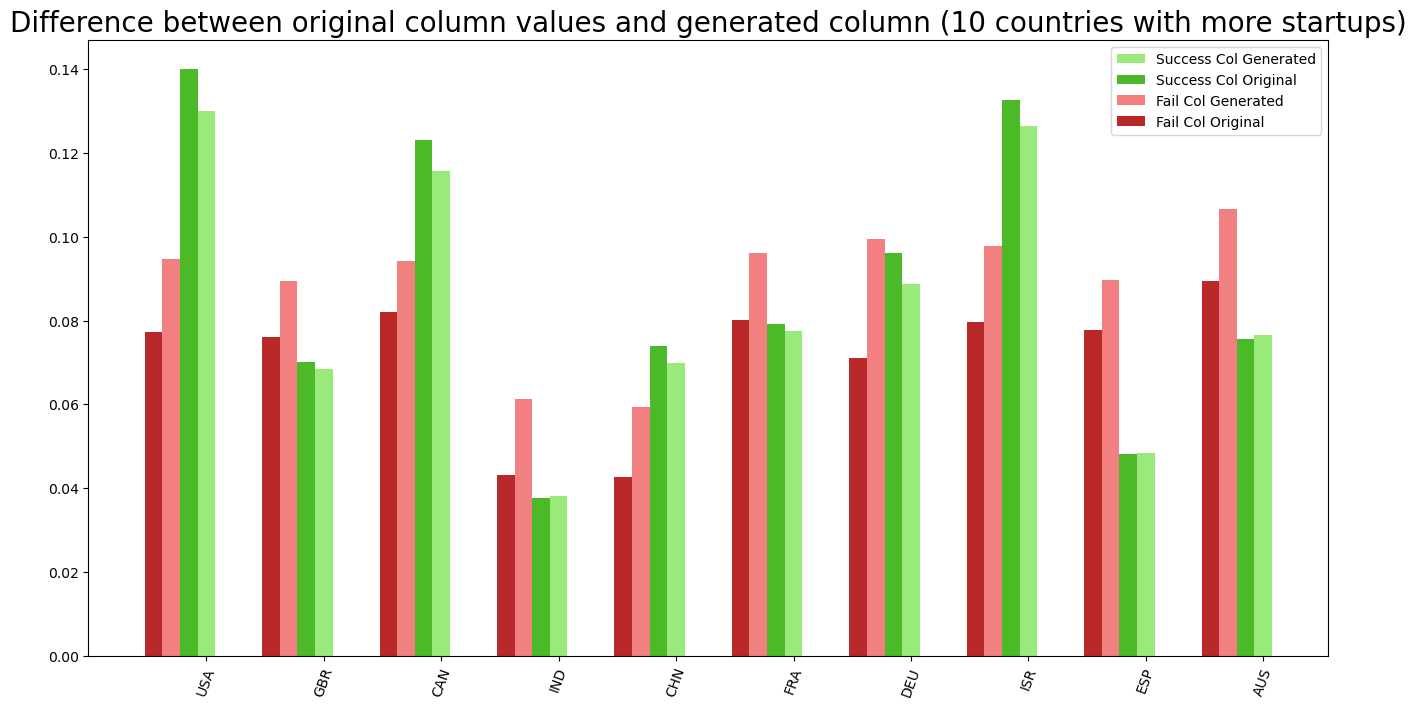

In [25]:
# Differences between both columns

n = len(country_column.index)
x = np.arange(n)
width = .15

plt.figure(figsize=(16,8))
plt.bar(x,country_column.success, width=width, label='Success Col Generated', color='#9AE97B' )
plt.bar(x - width,country_code_column.success, width=width, label='Success Col Original', color='#4CB929')
plt.bar(x - 2*width,country_column.fail, width=width, label='Fail Col Generated', color='#F38080')
plt.bar(x - 3*width,country_code_column.fail, width=width, label='Fail Col Original', color='#B92929')
plt.title('Difference between original column values and generated column (10 countries with more startups)', size=20)
plt.xticks(x,country_column.index,rotation=70)
plt.legend()
plt.show()

It seems reasonable, there's no a big difference of proportion regarding to the entire dataset.

<b>Random Sample Imputation with founded_at column.</b>
For missing values in the foundation date we will replace those values by the date of the first funding, and for those cases where we do not have either of the two values (24 inputs) we will fill them by doing a random sample imputation

In [26]:
years = []

for fou, first in zip(df.founded_at, df.first_funding_at):
  if isinstance(fou,str):
    years.append(int(fou.split('-')[0]))
  elif not isinstance(fou,str) and isinstance(first,str):
    years.append(int(first.split('-')[0]))
  else:
    date = int(np.random.choice(df.founded_at[df.founded_at.notnull()]).split('-')[0])
    years.append(date)

df['year'] = years
df[df.founded_at.isnull()].head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,founded_at,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,NaN,2015-01-05,2015-01-05,10000000,operating,0,1,0,IND,2015
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,NaN,2014-01-30,2014-01-30,3406878,operating,0,1,0,USA,2014
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,operating,HKG,NaN,Hong Kong,Hong Kong,...,NaN,2014-07-01,2014-07-01,41250,operating,0,1,0,HKG,2014
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,NaN,operating,USA,NC,NC - Other,Connellys Springs,...,NaN,2013-04-21,2013-04-21,10070591,operating,0,1,0,USA,2013
28,/organization/100du-tv,100du.tv,http://www.100du.com,Hospitality,3000000.0,operating,CHN,23,Shanghai,Shanghai,...,NaN,2008-01-07,2010-08-13,3000000,operating,0,1,0,CHN,2008


Simplify the category_list column
Let's create a column named main category, we're going to assume that the first description in
the category_list refers to the main category

In [30]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['main_category'] = main_category
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,first_funding_at,last_funding_at,funding_filled,status_class,fail,operating,success,country,year,main_category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,...,2015-01-05,2015-01-05,10000000,operating,0,1,0,IND,2015,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,...,2014-03-01,2014-10-14,700000,operating,0,1,0,USA,2014,Application Platforms
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,...,2014-01-30,2014-01-30,3406878,operating,0,1,0,USA,2014,Apps
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,...,2008-03-19,2008-03-19,2000000,operating,0,1,0,CHN,2007,Curated Web
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,...,2014-07-24,2014-07-24,10070591,operating,0,1,0,USA,2010,Software


### Drop the columns that we don't need for the analysis

In [31]:
df = df[['name','country','year','city','main_category','funding_rounds','funding_filled',
               'first_funding_at','last_funding_at','status','status_class','fail','operating','success']]
df.head()

,name,country,year,city,main_category,funding_rounds,funding_filled,first_funding_at,last_funding_at,status,status_class,fail,operating,success
0,#fame,IND,2015,Mumbai,Media,1,10000000,2015-01-05,2015-01-05,operating,operating,0,1,0
1,:Qounter,USA,2014,Delaware City,Application Platforms,2,700000,2014-03-01,2014-10-14,operating,operating,0,1,0
2,"(THE) ONE of THEM,Inc.",USA,2014,NaN,Apps,1,3406878,2014-01-30,2014-01-30,operating,operating,0,1,0
3,0-6.com,CHN,2007,Beijing,Curated Web,1,2000000,2008-03-19,2008-03-19,operating,operating,0,1,0
4,004 Technologies,USA,2010,Champaign,Software,1,10070591,2014-07-24,2014-07-24,operating,operating,0,1,0


# Exploratory Data Analysis

<Axes: >

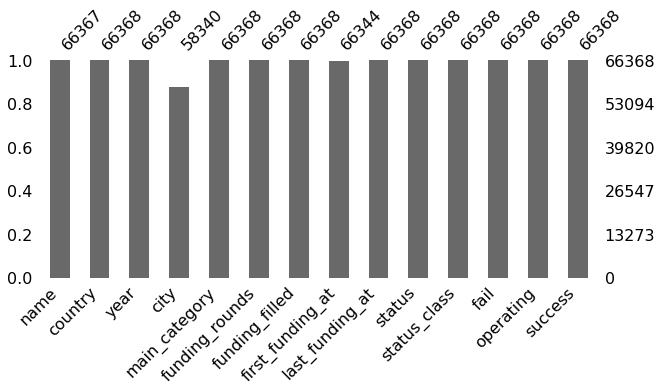

In [32]:
msno.bar(df,figsize=(10,4))

In [33]:
df.isnull().sum()/df.count()*100

name                 0.001507
country              0.000000
year                 0.000000
city                13.760713
main_category        0.000000
funding_rounds       0.000000
funding_filled       0.000000
first_funding_at     0.036175
last_funding_at      0.000000
status               0.000000
status_class         0.000000
fail                 0.000000
operating            0.000000
success              0.000000
dtype: float64

In [34]:
df.count().max()

66368

### How many startups achieve the success?

In [35]:
success_ratio = df.success.mean()*100
print(f'{df.success[df.success == 1].count()} startups reach success, what means {success_ratio:.2f}% of total')

7096 startups reach success, what means 10.69% of total


### How many startups fail?

In [36]:
fail_ratio = df.fail.mean()*100
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {fail_ratio:.2f}% of total')

6238 startups fail, what means 9.40% of total


C:\Users\Shreyash\AppData\Local\Temp\ipykernel_636\850168854.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


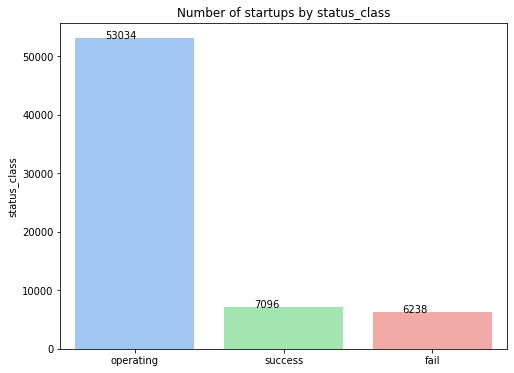

In [37]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class')
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-.20,y[i],y[i])

addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

<b>Filter the startups by foundation year</b><br>
Let's see only the startups founded after 1990, cause we want to see if there's a pattern between the most recent startups

In [39]:
df = df[(df.year > 1990) & (df.year < 2023)]
df.count().max()

64859

In [40]:
def group_by_status(column_name):
  # Group by a feature and calculate the fail/success rate
  group = df.groupby(column_name)[['success','fail','operating']].sum()
  group['total'] = group.sum(axis=1)
  group['success_ratio'] = group.success/group.total
  group['fail_ratio'] = group.fail/group.total
  return group

In [41]:
year_status = group_by_status('year')
year_status.sort_values(by='year', ascending=False).head()

,success,fail,operating,total,success_ratio,fail_ratio
year,,,,,,
2016,0.0,1.0,1.0,2.0,0.000000,0.500000
2015,48.0,621.0,2791.0,3460.0,0.013873,0.179480
2014,151.0,448.0,7155.0,7754.0,0.019474,0.057777
2013,172.0,358.0,7297.0,7827.0,0.021975,0.045739
2012,325.0,509.0,7097.0,7931.0,0.040978,0.064179


We can see a very clear outlier, and it corresponds to the year 2016, this is due to the small amount of the sample (only 2 entries), so the percentage is not representative.

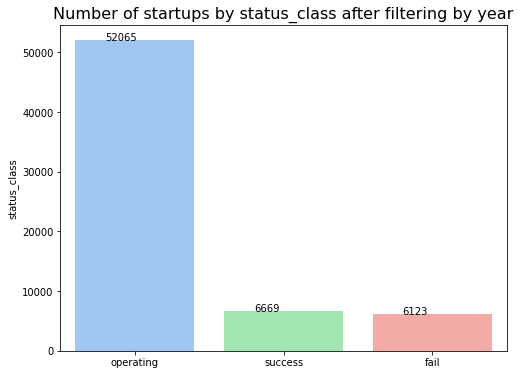

In [42]:
df = df[df.year < 2016]
year_status = year_status[year_status.index < 2016]
plt.figure(figsize=(8,6))
plt.title('Number of startups by status_class after filtering by year', size=16)
sns.barplot(x= df.status_class.value_counts().index, y=df.status_class.value_counts())
addlabels(df.status_class.value_counts().index,df.status_class.value_counts())

In [43]:
print(f'Number of startups: {df.count().max()}')
print(f'{df.success[df.success == 1].count()} startups reach success, what means {df.success.mean()*100:.2f}% of total')
print(f'{df.fail[df.fail == 1].count()} startups fail, what means {df.fail.mean()*100:.2f}% of total')

Number of startups: 64857
6669 startups reach success, what means 10.28% of total
6123 startups fail, what means 9.44% of total


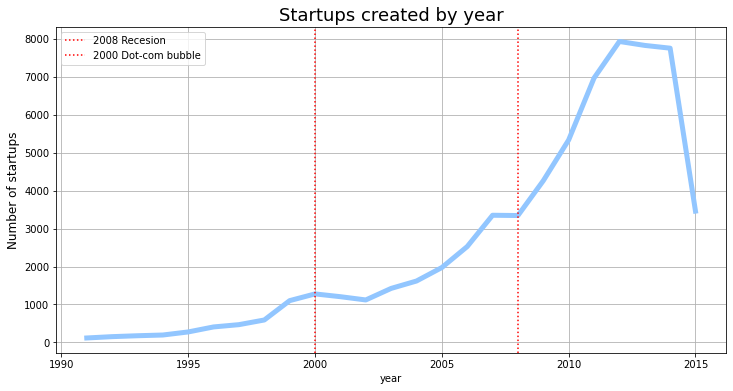

In [44]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Number of startups',size=12)
plt.grid()
sns.lineplot(data=year_status, x=year_status.index, y=year_status.total, linewidth=5)
plt.axvline(x=2008, color="red", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="red", label="2000 Dot-com bubble",linestyle=':')
plt.legend()

We can see in the trend line that there was a clear upward trend in terms of startup creation, with only two setbacks, located in 2000 and 2008, which makes sense, due to the crisis experienced during those years.

However, we can observe a slight drop in 2014 and a huge drop in 2015. This could be explained by the nature of the dataset and the possible lack of entries in the most recent years, as happened in a more extreme way with 2016.

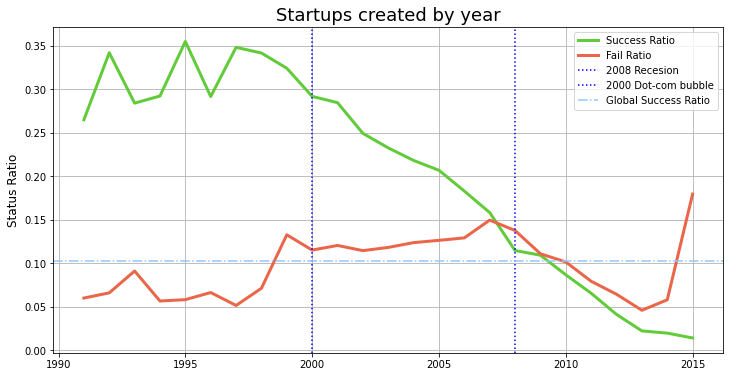

In [45]:
plt.figure(figsize=(12,6))
plt.title('Startups created by year', size=18)
plt.ylabel('Status Ratio',size=12)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].success_ratio,
         label='Success Ratio',color='#62CB3A',linewidth=3)
plt.plot(year_status[year_status.index < 2016].index,year_status[year_status.index < 2016].fail_ratio,
         label='Fail Ratio',color='#EA664A',linewidth=3)
plt.axvline(x=2008, color="blue", label="2008 Recesion",linestyle=':')
plt.axvline(x=2000, color="blue", label="2000 Dot-com bubble",linestyle=':')
plt.axhline(df.success.mean(), label='Global Success Ratio', linestyle='-.')
plt.grid()
plt.legend()

We can see a disturbing trend graph of both the percentage of startups that have succeeded and those that have failed over the years, we can see how in both crises, the trend went through an inflection point, in fact, it is just during the 2008 crisis that both trends intersect.

The most distressing thing of all is The clear downward trend in the success rate of startups since its peak in 1997.

<Axes: title={'center': 'Years distribution by status'}>

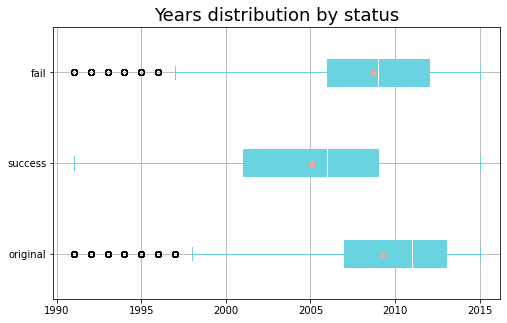

In [46]:
df_year = pd.DataFrame()
df_year['original'] = df.year
df_year['success'] = df.year[df.success == 1]
df_year['fail'] = df.year[df.fail == 1]

plt.figure(figsize=(8,5))
plt.title('Years distribution by status',size=18)
df_year.boxplot(color='#69D3DF', patch_artist=True, vert=0,showmeans=True, medianprops={'color':'white'})

We can see that both the mean and the median, as well as the large part of the data is in a range of years further away in the successful startups is less than those that have failed, this makes sense, following the same line of our analysis previously performed, in which we observe that the percentage of startups that achieve success is increasingly lower.

Although the graph of the number of stratups per year showed a large drop, we concluded that this could be due to a failure in the data collection and not to a real drop. Assuming that argument to be true, then we would see an upward trend in the number of startups per year, which would make sense, because it has democratized the use of tools that previously would have been accessible only to the wealthiest people. This means that the number of startups is on the rise, which in turn means that there is more and more competition and fewer startups are the ones that finally reach success in comparison of the total.

<b>Let's visualize how is the behavior of startups depending on the country.</b><br>
We'll going to ignore countries with less than 50 startups, because could distort the final result.

In [48]:
country_status = group_by_status('country')

# Filter by countries with at least 50 startups
countries_most = country_status.total[country_status.total >= 50]
print(f'There are {countries_most.count()} countries with at least 50 startups')

There are 47 countries with at least 50 startups


C:\Users\Shreyash\AppData\Local\Temp\ipykernel_636\4240955786.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world = top_ten.append(rest_world)


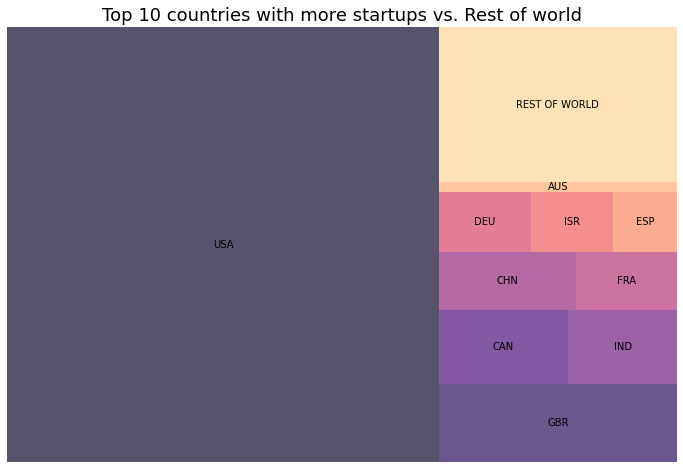

In [49]:
# Let's the proportion of the total startupos by countries
countries_analysis = country_status[country_status.total >= 50]
top_ten = countries_analysis.total.sort_values(ascending=False).head(10)
rest_world = pd.Series(countries_analysis.total.sort_values(ascending=False)[11:].sum(axis=0), index=['REST OF WORLD'])
world = top_ten.append(rest_world)

plt.figure(figsize=(12,8))
plt.title('Top 10 countries with more startups vs. Rest of world', size=18)
squarify.plot(sizes=world, label=world.index, color=sns.color_palette("magma",len(world)), alpha = 0.7)
plt.axis('off')
plt.show()

We can see that there is quite a wide difference between the US and the rest of the countries, in fact only the US represents more than 60% of the dataset, and has 10 times more startups than the second (UK) in the sample.

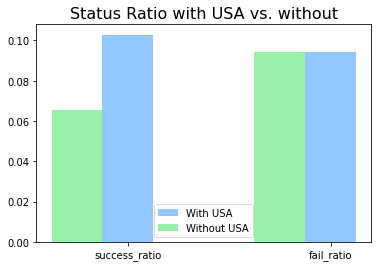

In [50]:
df_nousa = df[df.country != 'USA']

n = len(['success_ratio','fail_ratio'])
x = np.arange(n)
width = .25

plt.bar(x, df[['success','fail']].mean(), width=width, label='With USA')
plt.bar(x - width, df_nousa[['success','fail']].mean(), width=width, label='Without USA')
plt.title('Status Ratio with USA vs. without', size=16)
plt.xticks(x,['success_ratio','fail_ratio'])
plt.legend()
plt.show()

A large part of the world success rate is influenced by the success rate in the USA, which is not the case for the failure rate.

In [52]:
!pip install geopandas

  Using cached geopandas-0.13.2-py3-none-any.whl (1.1 MB)
  Using cached Fiona-1.9.4.post1-cp310-cp310-win_amd64.whl (22.7 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python310\\Scripts\\fio.exe' -> 'C:\\Python310\\Scripts\\fio.exe.deleteme'



C:\Users\Shreyash\AppData\Local\Temp\ipykernel_636\1002483581.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


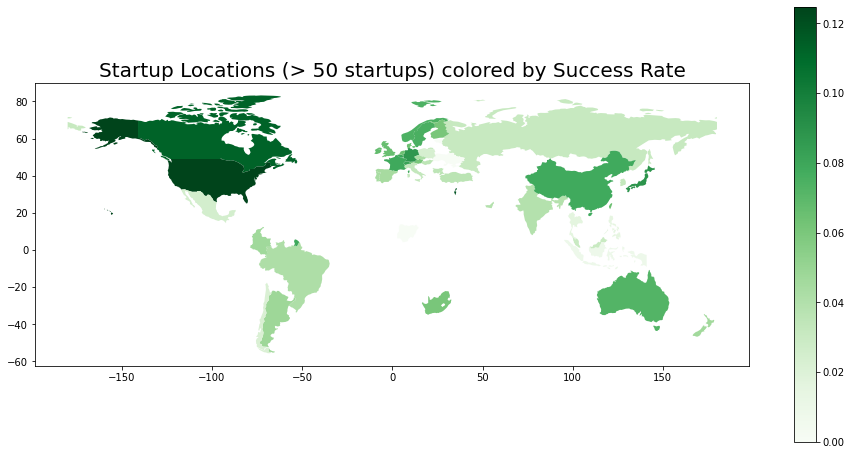

In [54]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.success_ratio.reset_index(name='success_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='success_ratio', cmap='Greens', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Success Rate',size=20)
plt.show()

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_636\1924942424.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


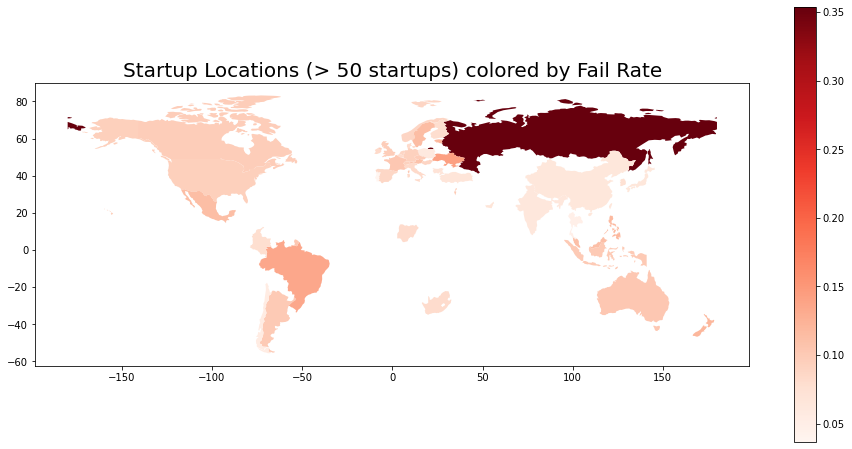

In [55]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.fail_ratio.reset_index(name='fail_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='fail_ratio', cmap='Reds', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Fail Rate',size=20)
plt.show()

We can see that the vast majority of countries with a high success rate are located between North America and Europe (except for Israel, China and Japan).

On the other hand, we can clearly observe Russia as the country with the highest failure rate of all, being much higher than the rest. Followed by Peru, at a considerable distance.

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_636\4048968373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_analysis['best_ratio'] = countries_analysis.success_ratio/countries_analysis.fail_ratio
C:\Users\Shreyash\AppData\Local\Temp\ipykernel_636\4048968373.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


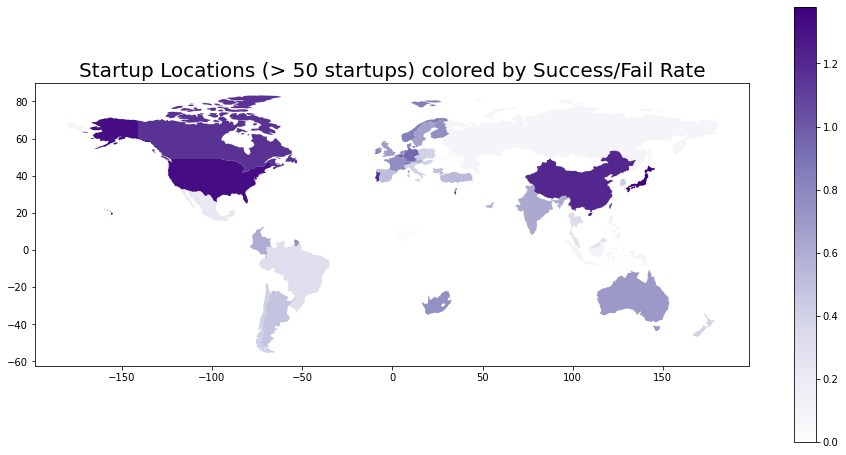

In [56]:
countries_analysis['best_ratio'] = countries_analysis.success_ratio/countries_analysis.fail_ratio

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
iso_counts = countries_analysis.best_ratio.reset_index(name='best_ratio')
merged = countries.merge(iso_counts, left_on='iso_a3', right_on='country')
merged.plot(column='best_ratio', cmap='Purples', legend=True, figsize=(16,8))
plt.title('Startup Locations (> 50 startups) colored by Success/Fail Rate',size=20)
plt.show()

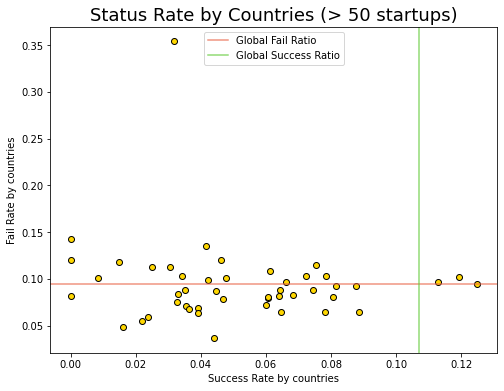

In [57]:
plt.figure(figsize=(8,6))
plt.title('Status Rate by Countries (> 50 startups)', size=18)
plt.ylabel('Fail Rate by countries')
plt.xlabel('Success Rate by countries')
plt.axhline(0.094, label='Global Fail Ratio', linestyle='-', color='#EA664A', alpha=.7)
plt.axvline(0.1069, label='Global Success Ratio', linestyle='-',color='#62CB3A', alpha=.7)
plt.legend(loc='upper center')
plt.scatter(countries_analysis.success_ratio,countries_analysis.fail_ratio, color='gold', edgecolor='k')

We have a condensation of countries, but there are particularly 5 that stand out from the rest of the group, on the one hand we have Russia and Peru, with a high failure rate, being the case of Russia the most extreme (with a failure rate of 3.5 times the global average rate).

On the other hand, we have USA, Israel and Canada, being the only ones to exceed the global average success rate.

## Let's break down the countries by year

In [58]:
country_year = group_by_status(['country','year'])

# Filter by total of startups founded at that year
country_year[country_year['total'] > 20].sort_values(by='success_ratio',ascending=False).head(10)

success   fail  operating  total  success_ratio  fail_ratio
country year                                                             
ISR     2000     12.0    4.0       12.0   28.0       0.428571    0.142857
USA     1997    128.0   15.0      181.0  324.0       0.395062    0.046296
GBR     1999     18.0    8.0       20.0   46.0       0.391304    0.173913
USA     1995     78.0   13.0      114.0  205.0       0.380488    0.063415
        1998    162.0   29.0      238.0  429.0       0.377622    0.067599
DEU     1999      8.0    2.0       12.0   22.0       0.363636    0.090909
USA     1992     39.0    7.0       63.0  109.0       0.357798    0.064220
        1999    282.0  105.0      427.0  814.0       0.346437    0.128993
        1993     42.0    9.0       75.0  126.0       0.333333    0.071429
        1996     95.0   18.0      182.0  295.0       0.322034    0.061017

In [59]:
country_year[country_year['total'] > 20].sort_values(by='fail_ratio',ascending=False).head(10)

success  fail  operating  total  success_ratio  fail_ratio
country year                                                            
RUS     2012      0.0  65.0       61.0  126.0       0.000000    0.515873
        2013      1.0  38.0       64.0  103.0       0.009709    0.368932
KOR     2015      0.0  12.0       22.0   34.0       0.000000    0.352941
BRA     2015      0.0   8.0       15.0   23.0       0.000000    0.347826
RUS     2009      3.0   8.0       12.0   23.0       0.130435    0.347826
        2011      1.0  26.0       49.0   76.0       0.013158    0.342105
BRA     2009      2.0   8.0       16.0   26.0       0.076923    0.307692
DNK     2015      0.0   6.0       16.0   22.0       0.000000    0.272727
CAN     2003      8.0  12.0       25.0   45.0       0.177778    0.266667
ISR     2007      8.0  16.0       41.0   65.0       0.123077    0.246154

We can clearly see a huge presence of the United States in the top, showing a great success rate in different years.

Another fact is that the most recent year that appears in the top is 2001, which coincides with what was previously discovered (the downward trend in the success rate of startups), confirming that it is global.

Definitely we can say that it is very important, the time and place, when starting a business, as these directly affect the chances of success or failure of a business. Although we can say that the percentage of success is more influenced by the country where the startup was founded has a greater weight than the year of foundation.

#### US cities
Since the USA is by far the largest producer of startups worldwide, let's take a closer look at which cities have the largest number of startups, as well as their success/failure ratios.

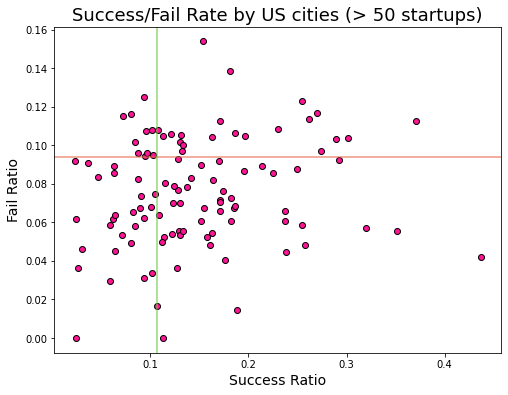

In [60]:
# We're gonna ignore those null values in city

usa_startups = df[df.country == 'USA']
usa_startups = usa_startups[usa_startups.city.notnull()]

usa_cities = usa_startups.groupby('city')[['fail','success','operating']].sum()
usa_cities['total'] = usa_cities.sum(axis=1)
usa_cities['success_ratio'] = usa_cities.success/usa_cities.total
usa_cities['fail_ratio'] = usa_cities.fail/usa_cities.total
usa_cities_most = usa_cities[usa_cities.total > 50]

successful_cities = usa_cities[usa_cities.total > 50].sort_values(by='success_ratio', ascending=False)

plt.figure(figsize=(8,6))
plt.scatter(usa_cities_most.success_ratio,usa_cities_most.fail_ratio, color='deeppink', edgecolor='k')
plt.title('Success/Fail Rate by US cities (> 50 startups)', size=18)
plt.ylabel('Fail Ratio', size=14)
plt.xlabel('Success Ratio', size=14)
plt.axhline(0.094, label='Global Fail Ratio', linestyle='-', color='#EA664A', alpha=.7)
plt.axvline(0.1069, label='Global Success Ratio', linestyle='-',color='#62CB3A', alpha=.7)

posx and posy should be finite values
posx and posy should be finite values


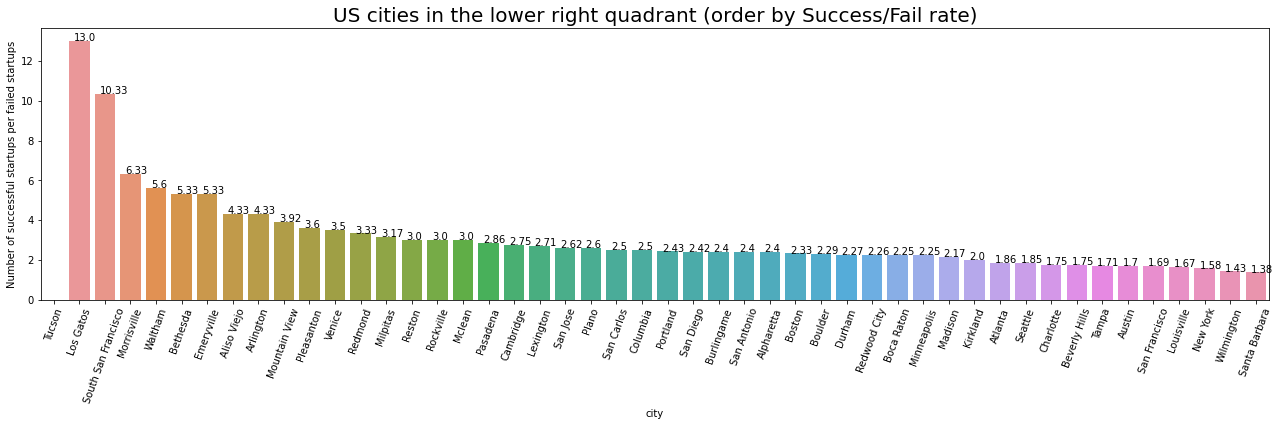

In [61]:
uscities_bestratio = usa_cities_most[(usa_cities_most.success_ratio > success_ratio/100) & (usa_cities_most.fail_ratio < fail_ratio/100)]
uscities_bestratio = uscities_bestratio.success_ratio/uscities_bestratio.fail_ratio
uscities_bestratio = uscities_bestratio.sort_values(ascending=False)

plt.figure(figsize=(22,5))
sns.barplot(x=uscities_bestratio.index,y=uscities_bestratio)
plt.title('US cities in the lower right quadrant (order by Success/Fail rate)', size=20)
plt.ylabel('Number of successful startups per failed startups')
plt.xticks(rotation=70)
addlabels(uscities_bestratio.index,round(uscities_bestratio,2))
plt.show()

Tucson has zero closed startups registered so far, so, we cannot calculate a ratio of successful startups versus failures. We see that there are many cities with very high ratios, which means that there are many geographic areas in the USA where it is much more likely to succeed than to fail.

We can see the big difference in spreads between the global success/failure rates (which are very close to each other), and on the other hand, there is a very big spread when we compare that of the cities with the most startups in the USA.

of the 25 US cities with the most startups, only 6 do not exceed the level of the worldwide success ratio. And 5 of them more than double the global success rate.
Only Los Angeles has a failure rate higher than the success rate.

## Are there categories with a higher success ratio?

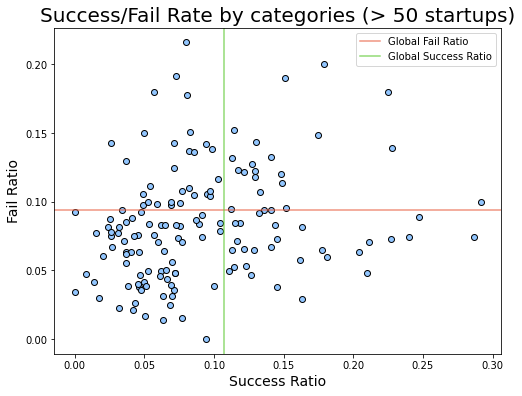

In [62]:
category_ratio = group_by_status('main_category')
category_ratio = category_ratio[category_ratio.index != 'Other']
category_ratio = category_ratio[category_ratio.total > 50]

plt.figure(figsize=(8,6))
plt.title('Success/Fail Rate by categories (> 50 startups)', size=20)
plt.ylabel('Fail Ratio', size=14)
plt.xlabel('Success Ratio', size=14)
plt.scatter(category_ratio.success_ratio, category_ratio.fail_ratio, edgecolor='k')
plt.axhline(0.094, label='Global Fail Ratio', linestyle='-', color='#EA664A', alpha=.7)
plt.axvline(0.1069, label='Global Success Ratio', linestyle='-',color='#62CB3A', alpha=.7)
plt.legend(loc='upper right')

We can see that in the lower right quadrant is where the categories that interest us most are, since they are those with the highest hit rate, and at the same time a lower failure rate. At the top left are all those categories that we would like to avoid.

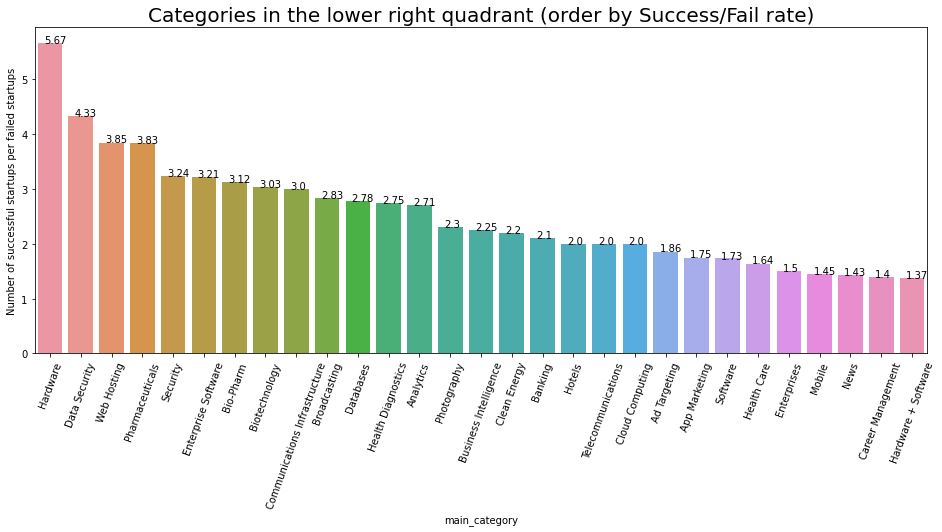

In [63]:
categories_bestratio = category_ratio[(category_ratio.success_ratio > success_ratio/100) & (category_ratio.fail_ratio < fail_ratio/100)]
categories_bestratio = categories_bestratio.success_ratio/categories_bestratio.fail_ratio
categories_bestratio = categories_bestratio.sort_values(ascending=False)

plt.figure(figsize=(16,6))
plt.title('Categories in the lower right quadrant (order by Success/Fail rate)', size=20)
plt.ylabel('Number of successful startups per failed startups')
plt.xticks(rotation=70)
sns.barplot(x=categories_bestratio.index,y=categories_bestratio)

addlabels(categories_bestratio.index,round(categories_bestratio,2))
plt.show()

## Is there any relation between funding rounds and success/fail rate?

<Axes: title={'center': 'Status by funding_rounds'}, xlabel='funding_rounds'>

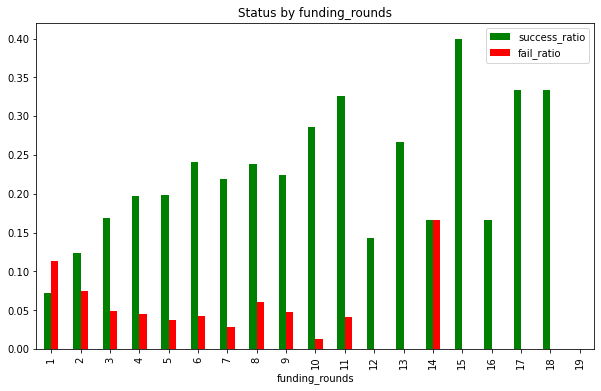

In [64]:
funding_status = group_by_status('funding_rounds')
funding_status[['success_ratio','fail_ratio']].plot(kind='bar', stacked=False, color=['green','red'], figsize=(10,6), title='Status by funding_rounds')

In [65]:
funding_status.total

funding_rounds
1     41281.0
2     12159.0
3      5544.0
4      2705.0
5      1452.0
6       769.0
7       415.0
8       214.0
9       125.0
10       77.0
11       49.0
12       28.0
13       15.0
14        6.0
15        5.0
16        6.0
17        3.0
18        3.0
19        1.0
Name: total, dtype: float64

A large percentage of startups have received less than 3 rounds of funding.

Text(0.5, 0, 'Financing received (logarithmic scale)')

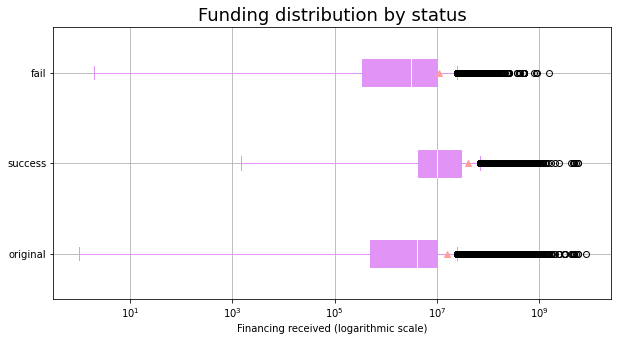

In [66]:
df_funding = pd.DataFrame()
df_funding['original'] = df.funding_filled
df_funding['success'] = df.funding_filled[df.success == 1]
df_funding['fail'] = df.funding_filled[df.fail == 1]

plt.figure(figsize=(10,5))
plt.xscale('log')
plt.title('Funding distribution by status',size=18)
df_funding.boxplot(color='#E193F6', patch_artist=True, vert=0,showmeans=True, medianprops={'color':'white'})
plt.xlabel('Financing received (logarithmic scale)')

In [67]:
df_funding[['success','fail']].describe()

,success,fail
count,6.669000e+03,6.123000e+03
mean,4.025030e+07,1.082646e+07
std,1.889407e+08,3.922704e+07
min,1.500000e+03,2.000000e+00
25%,4.290000e+06,3.500000e+05
50%,1.007059e+07,3.167062e+06
75%,3.000000e+07,1.007059e+07
max,5.820000e+09,1.567504e+09


The successful stratups have received more funding than the unsuccessful ones, although this is not an extreme difference either. Both the mean and median are relatively close. What we can observe is that the IQR range is narrower for the successful startups.

Text(0.5, 1.0, 'Funding received by success startups (IQR range)')

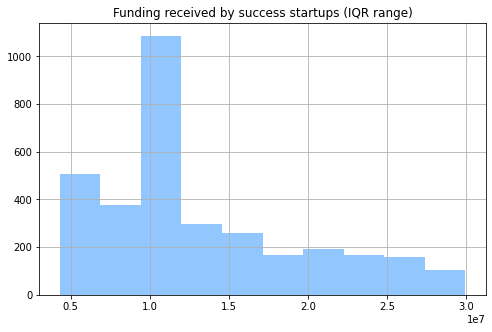

In [70]:
df.funding_filled[(df.funding_filled > np.percentile(df.funding_filled[df.success == 1], q=25)) 
& (df.funding_filled < np.percentile(df.funding_filled[df.success == 1], q=75)) 
& (df.success == 1)].hist(
    figsize=(8,5),
)
plt.title('Funding received by success startups (IQR range)')

Text(0.5, 1.0, 'Funding received by fail startups (IQR range)')

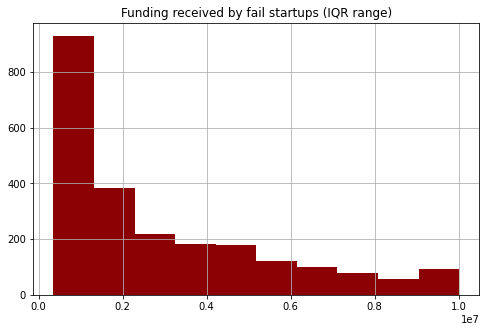

In [71]:
df.funding_filled[(df.funding_filled > np.percentile(df.funding_filled[df.fail == 1], q=25)) 
& (df.funding_filled < np.percentile(df.funding_filled[df.fail == 1], q=75)) 
& (df.fail == 1)].hist(
    figsize=(8,5), color='darkred'
)
plt.title('Funding received by fail startups (IQR range)')

We can conclude that the amount of money received is related to the failure or success of a startup, however, we must point out that we are probably facing a bi-directional causality, since, thinking logically, if a company receives a greater amount of funding it will be more likely to expand and overcome problems, but it is also true that for a company to receive a greater amount of money it is normal that it is because it has a good potential, or because it has been doing things right.

So, it is inconclusive to say that the success or failure of a company is determined by the amount of money it receives.

In [7]:
US_Data = df[df['country_code'] == 'USA']

In [8]:
US_Data

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,NaN,2013-04-21,2013-04-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66356,/organization/zype,Zype,http://www.zype.com,Cloud Computing|Mobile Advertising|Video|Video...,3300000,operating,USA,NY,New York City,New York,2,2013-01-01,2015-04-01,2015-10-27
66357,/organization/zypsee,Whisk (formerly Zypsee),http://whisk.me,Public Transportation,2150000,operating,USA,NY,New York City,New York,2,2011-01-01,2013-07-26,2013-09-25
66359,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,1510500,operating,USA,MA,Boston,Cambridge,4,NaN,2010-10-21,2012-10-18
66360,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,8500000,acquired,USA,WI,Milwaukee,Milwaukee,1,NaN,2004-12-16,2004-12-16
